In [68]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

- Зібрати дані опитування

In [69]:
# зібрати всі дані в df
df_bus_stantion = pd.read_csv("./data/Bus Stantion + Park_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #bus stanion
df_central_square = pd.read_csv("./data/Central square_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #central square
df_linkedin = pd.read_csv("./data/Lkdn_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #linkedin
df_social_media = pd.read_csv("./data/Володимир Медіа_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #internet
df_kogorta = pd.read_csv("./data/Когорта_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #individual groups

- Функція упорядкування даних

In [70]:
def add_origin_column(df, column_name):
    df["origin"] = column_name
    df = df.rename(
        columns={
            "Стать респондента": "sex", 
            "Рік народження": "age",
            "Скільки часу ви проживаєте у місті Володимир": "нears_lived",
            "Ваш рід занять": "occupation",
            "Рівень доходу": "sallary",
            "Яку частину доходу ви витрачаєте на діяльсть пов'язану з туризмом та сферою обслуговування ": "Income_spent_on_tourism",
            "Як ви ставитесь до візитів хасидів до Володимира?": "hasidic_loyalty",
            "Як ви ставитесь до туристів з Польщі?": "polish_loyalty",
            "Як ви ставитесь до туристів з інших країн?":"other_loyalty",
            "На вашу думку який у вас рівень володіння англійською мовою?":"english_level",
            "На вашу думку який у вас рівень володіння польською мовою?":"polish_level",
            "Чи достатньо, на вашу думку, у Володимирі готелей, для розміщення туристів чи туристичних груп?":"holels_sits",
            "Чи достатньо, на вашу думку, у Володимирі закладів харчування?":"caffee_sits",
            "Чи вважаєте ви, що Володимир достатньо представлений в інтернеті як туристичне місто?":"internet_representation",
            " Які туристичні об’єкти у Володимирі є, на вашу думку, ключовими для приваблення туристів?":"key_items",
            "Які зміни в туристичній інфраструктурі ви вважаєте найбільш необхідними? (можна кілька варіантів)":"key_changes",
            "Які об’єкти, на вашу думку, слід відкрити чи розвинути у Володимирі, щоб туристи залишалися довше? (можна кілька варіантів)":"tourism_development",    
            "Як ви ставитесь до візитів хасидів до Володимира?\n\nцього читати респондентам не потрібно (Карлін-столінські хасиди, вшановують пам’ять свого цадика (духовного провідника) Шломо Готліба Карлінера, який помер у 1792 році і похований на колишньому єврейському цвинтарі, нині це паркова зона в районі вулиці Драгоманова)  " : "hasidic_loyalty2"       
            })
    return df

- додати необхідні колонки

In [71]:
# прогнати дані через функцію нормалізації
df_bus_stantion = add_origin_column(df_bus_stantion, "bus stantion")
df_central_square = add_origin_column(df_central_square, "central_square")
df_linkedin = add_origin_column(df_linkedin, "linkedin")
df_social_media = add_origin_column(df_social_media, "social media")
df_kogorta = add_origin_column(df_kogorta, "test group")

# одбєднати дані в спільний dataframe
df_union =  pd.concat([df_bus_stantion, df_central_square, df_linkedin, df_social_media, df_kogorta], axis=0, ignore_index=True)
df_union["hasidic_loyalty_total"] = df_union["hasidic_loyalty"].fillna(df_union["hasidic_loyalty2"])

df_union.groupby('sex')


In [72]:
df_union.head()

,Timestamp,sex,age,нears_lived,occupation,sallary,Income_spent_on_tourism,hasidic_loyalty2,polish_loyalty,other_loyalty,...,polish_level,holels_sits,caffee_sits,internet_representation,key_items,key_changes,tourism_development,origin,hasidic_loyalty,hasidic_loyalty_total
0,2025/09/06 11:41:37 AM GMT+3,Чоловіча,2009.0,10-20 років,Студент,10 000 грн - 20 000 грн,10%-20%,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",...,елементарний (A2),Ні,Частково,Так,Вали городища;Заклади харчування;Центральна площа,Організація нових культурних та розважальних п...,"МакДональдс чи інший fast-food;Лазертаг, боулі...",bus stantion,NaN,"Позитивно, туристи це завжди добре для міста"
1,2025/09/06 11:43:48 AM GMT+3,Чоловіча,2009.0,10-20 років,Учень,до 10 000 грн,10%-20%,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",...,елементарний (A2),Частково,Так,Так,Вали городища,Покращення доріг і транспортного сполучення;Бі...,"МакДональдс чи інший fast-food;Лазертаг, боулі...",bus stantion,NaN,"Позитивно, туристи це завжди добре для міста"
2,2025/09/06 12:01:46 PM GMT+3,Жіноча,NaN,2-5 років,Студент,10 000 грн - 20 000 грн,10%-20%,"Негативно, вони залишають багато сміття і вони...","Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",...,середній (B1),Ні,Так,Ні,Вали городища,Краще туристичне зонування та навігація (вказі...,"Лазертаг, боулінг, кінотеатр;Рекреаційна зона ...",bus stantion,NaN,"Негативно, вони залишають багато сміття і вони..."
3,2025/09/06 12:24:55 PM GMT+3,Жіноча,2007.0,2-5 років,Студент,NaN,до 5%,"Негативно, вони залишають багато сміття і вони...","Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",...,елементарний (A2),Частково,Частково,Так,Таких немає,"Більше місць для проживання (готелі, хостели, ...","МакДональдс чи інший fast-food;Лазертаг, боулі...",bus stantion,NaN,"Негативно, вони залишають багато сміття і вони..."
4,2025/09/06 12:42:55 PM GMT+3,Жіноча,1970.0,менше 2 років,NaN,NaN,до 5%,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",...,NaN,Частково,Так,NaN,Вали городища,Краще туристичне зонування та навігація (вказі...,Рекреаційна зона відпочинку з водоймою;SPA- та...,bus stantion,NaN,"Позитивно, туристи це завжди добре для міста"


['Жіноча, 135 люд, 72.6%', 'Чоловіча, 49 люд, 26.3%', 'Не вказано, 2 люд, 1.1%']


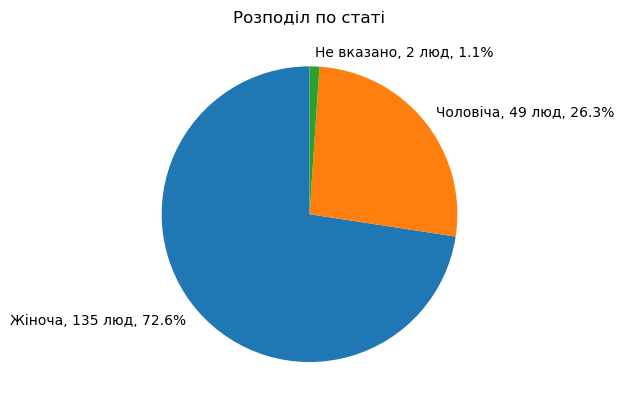

In [112]:
counts = df_union['sex'].fillna("Не вказано").value_counts(dropna=False)
total = counts.sum()
labels = []

for i in counts.items():  
    perc = f"{round(i[1]/total*100,1)}%"
    labels.append(f'{i[0]}, {i[1]} люд, {perc}')
print(labels)
ax = counts.plot(
    kind='pie',
    labels=labels,     # тут усе: назва, кількість і %
    autopct=None,      # нічого всередині секторів
    ylabel='',
    startangle=90,
    labeldistance=1.1,  # відстань підписів від центру
    title="Розподіл по статі"
)

plt.show()